<a href="https://colab.research.google.com/github/Bharatgaur/Exploratory-data-analysis-EDA-/blob/main/Automobile_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

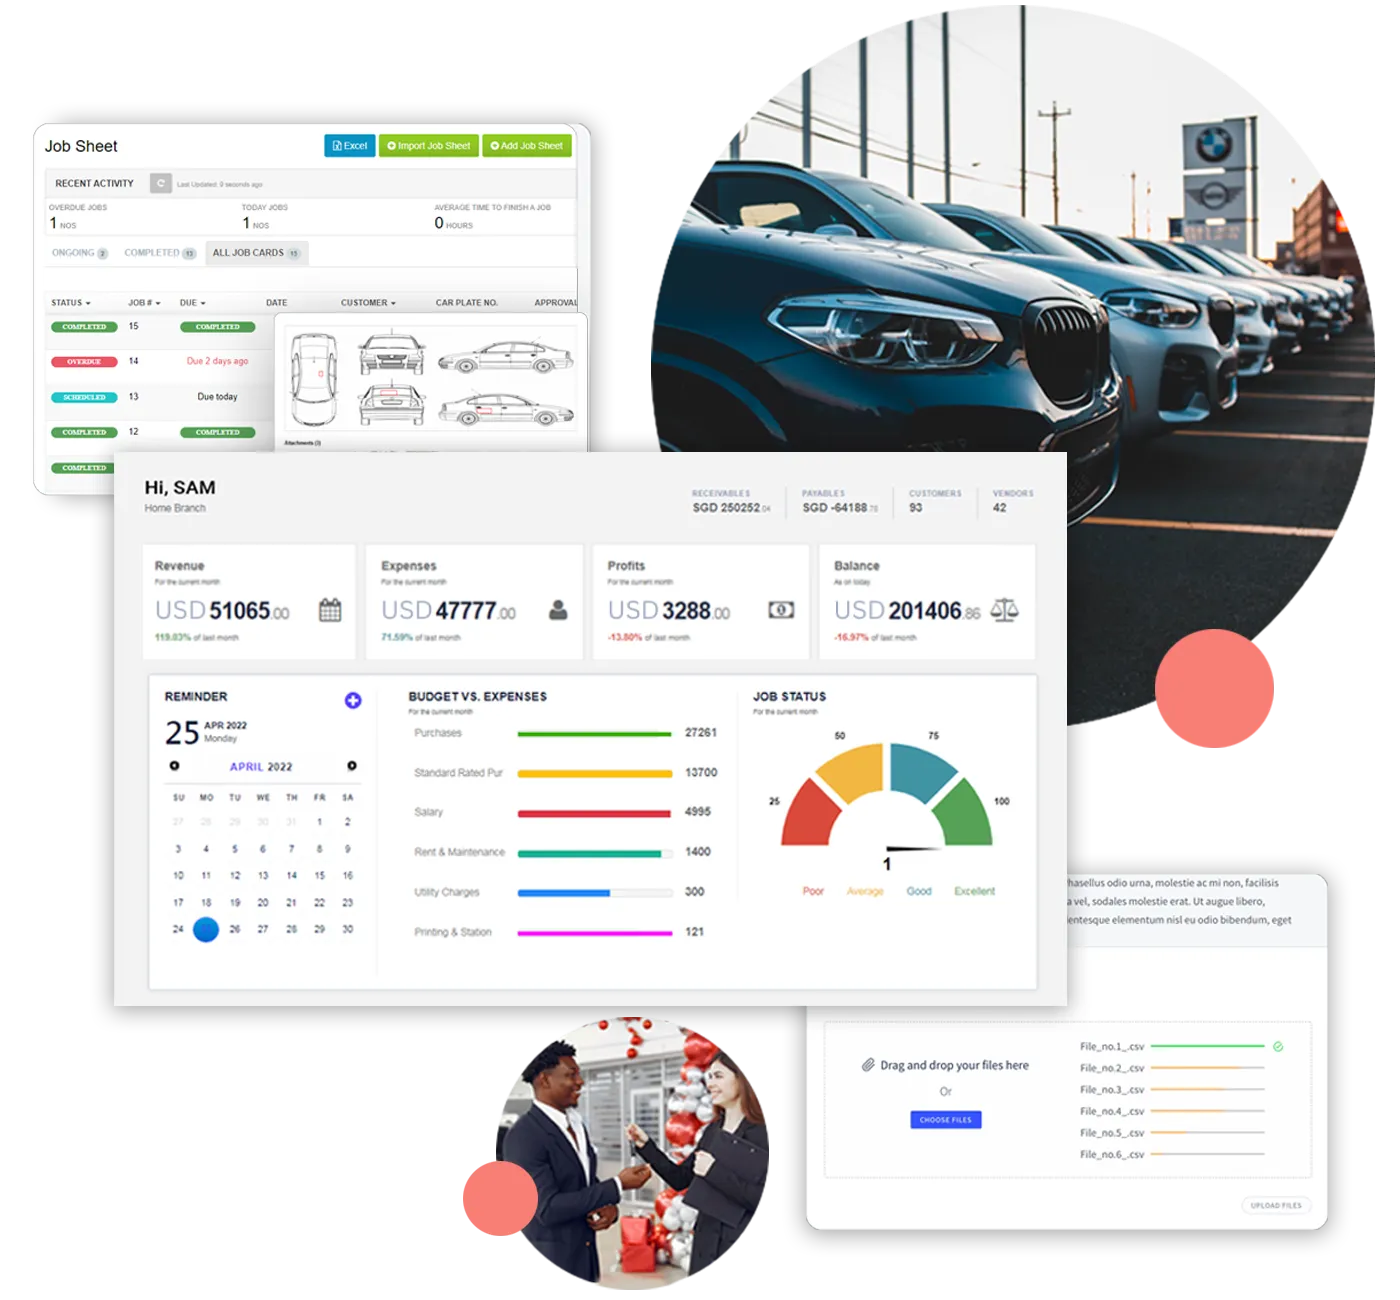

# **Automobile Sales**

Dataset link Kaggle


Problem Statement:
The task is to perform exploratory data analysis (EDA) on an Automobile Sales dataset to gain insights into the sales trends, customer behavior, and overall performance of the sales operations. The dataset contains information about individual orders placed by customers, including the quantity ordered, price of each item, sales amount, order date, customer details, product information, and other relevant attributes.

Questions for EDA:
1. What is the distribution of the quantity ordered in the dataset?
2. How does the price of each item vary across different product lines?
3. What is the overall sales trend over time? Are there any seasonal patterns?
4. What is the average sales amount per order?
5. How do the sales amounts vary based on the status of the orders?
6. Which product lines contribute the most to the total sales revenue?
7. Is there a correlation between the number of days since the last order and the order quantity?
8. How do the deal sizes vary across different product lines?
9. What are the top-selling products based on the quantity ordered?
10. How do the sales amounts vary across different countries or regions?
11. Are there any outliers in the dataset, and if so, what might be the reasons behind them?
12. Is there any relationship between the manufacturer’s suggested retail price (MSRP) and the actual price each item sells for?
13. What is the average number of items per order?
14. How do the sales amounts differ based on the customer’s location (city or country)?
15. Are there any trends or patterns in customer purchasing behavior based on the frequency of orders?

These questions will help in exploring various aspects of the Automobile Sales dataset and provide insights that can inform decision-making processes related to sales strategies, inventory management, and customer relationship management.





